In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from graphviz import pipe_lines
from mlflow import catboost
from mlflow.metrics import f1_score
from pandas.core.common import random_state
from scipy.constants import precision
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sqlalchemy.sql.util import criterion_as_pairs
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import Binarizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.metrics import precision_recall_curve, roc_curve, roc_auc_score, auc
from sklearn.preprocessing import label_binarize
import sklearn
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
pd.options.display.max_columns = None
sklearn.set_config(transform_output='pandas')
from sklearn.metrics import average_precision_score
import mlflow
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from lightgbm import LGBMClassifier
mlflow.set_registry_uri('./mlruns')
import optuna
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from catboost import CatBoostClassifier
from catboost import CatBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, VotingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import phik
import joblib

In [3]:
df = pd.read_csv('data/telco_customer_churm.csv')

In [4]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [7]:
df.Churn.value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [8]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [9]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
print(df['TotalCharges'].isnull().sum())


11


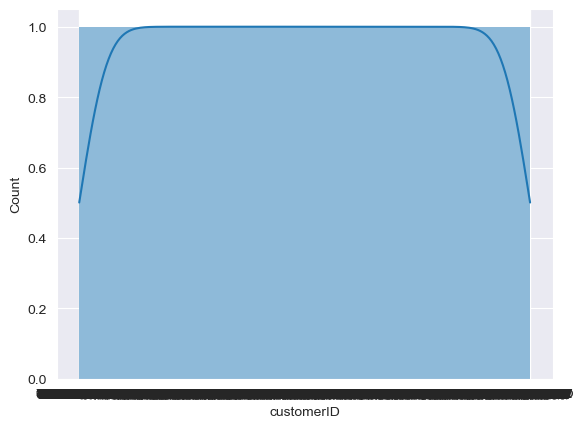

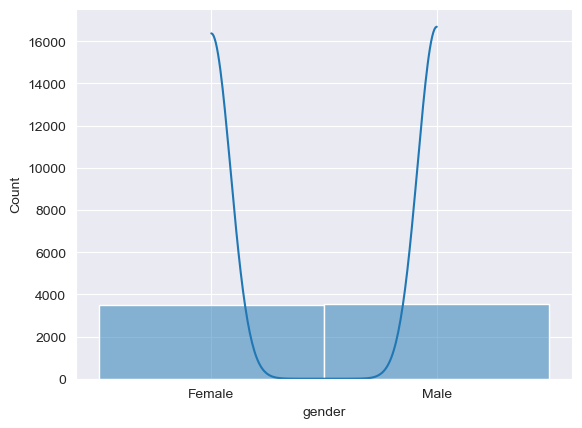

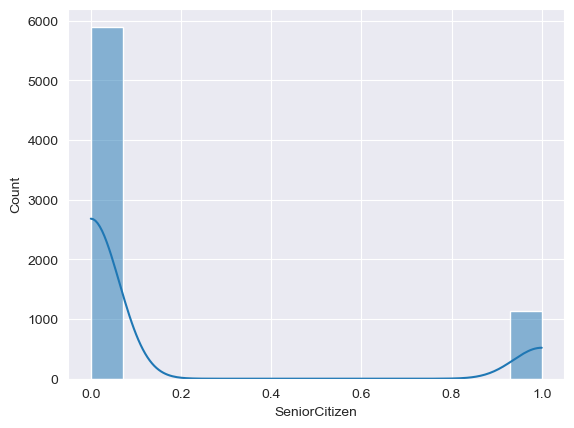

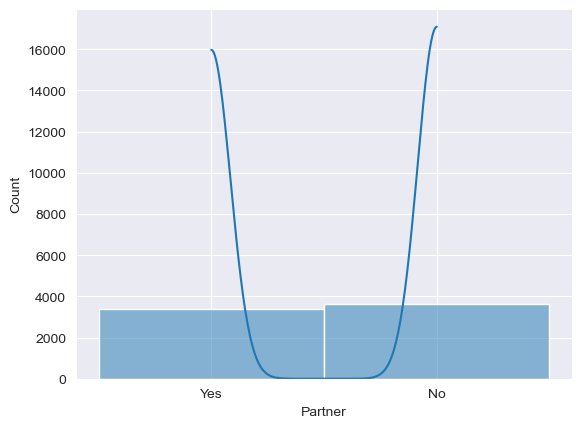

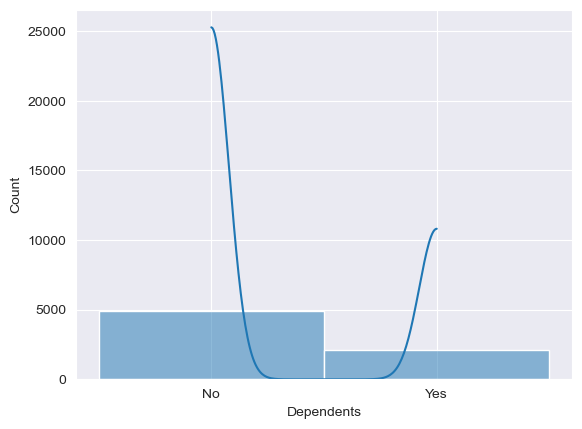

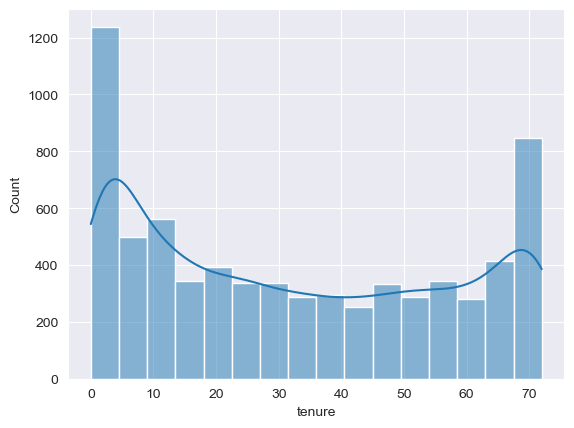

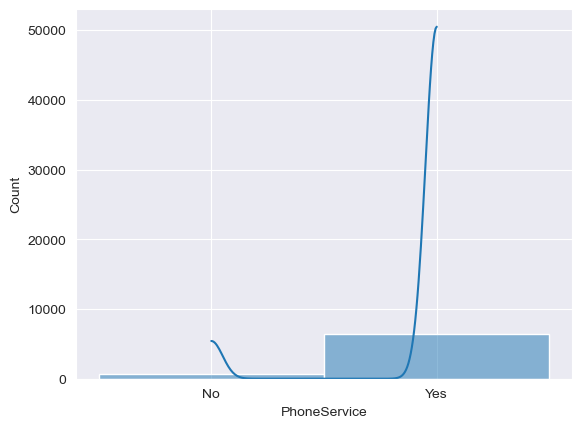

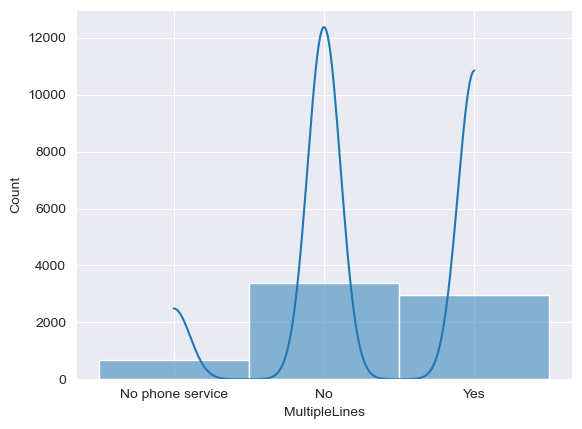

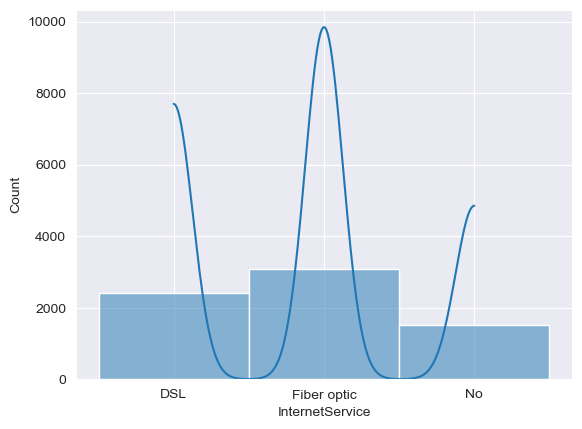

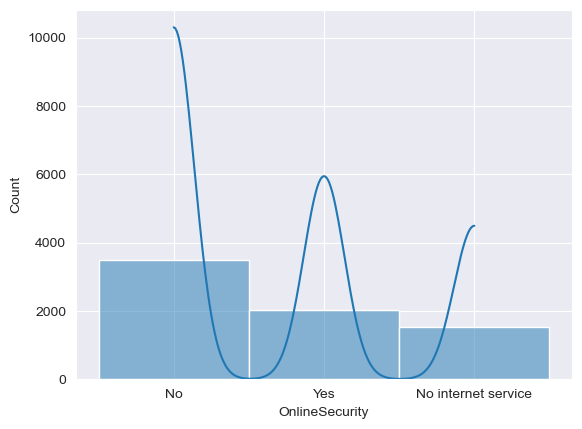

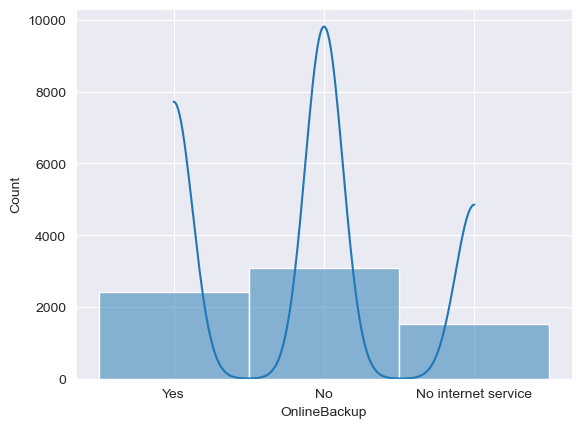

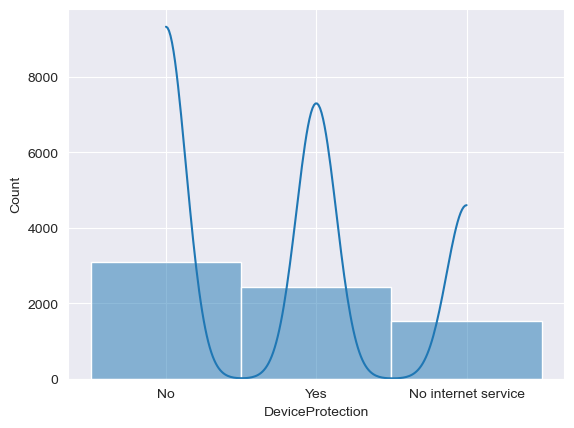

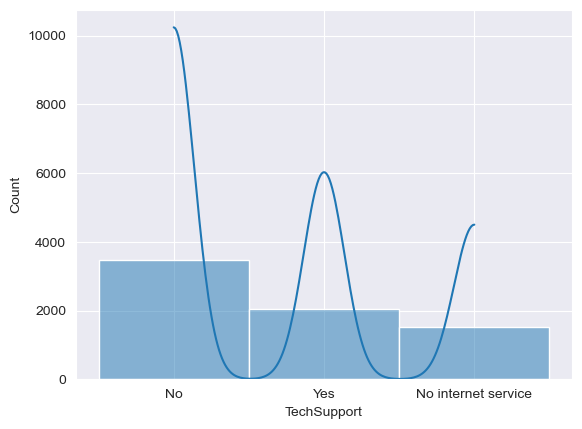

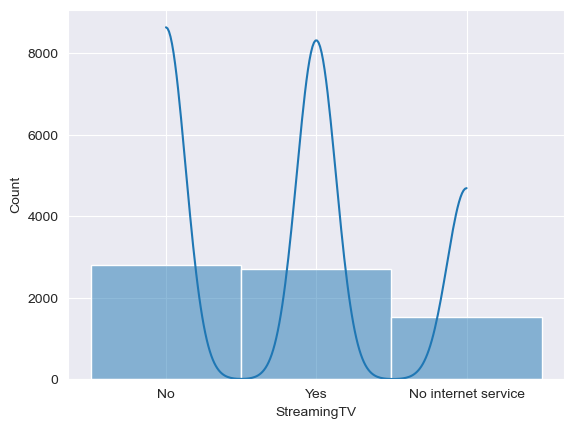

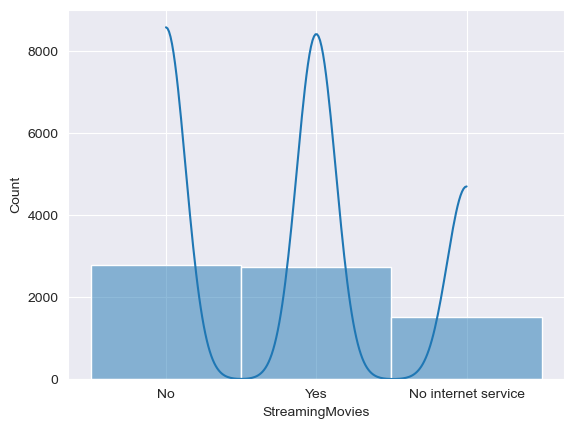

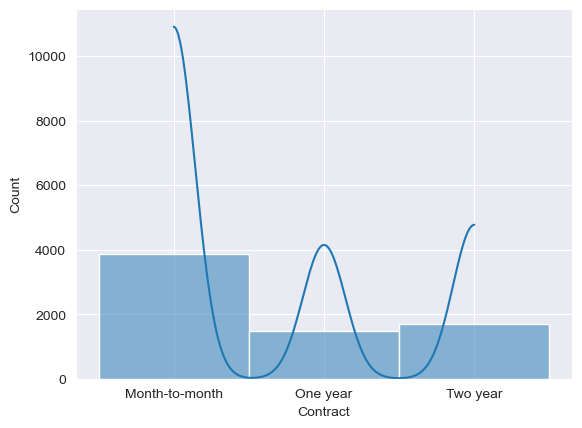

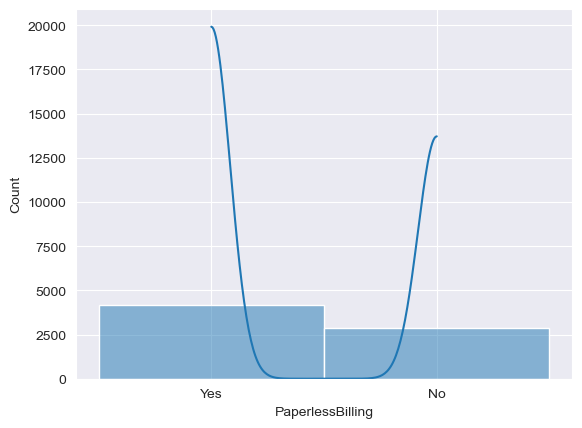

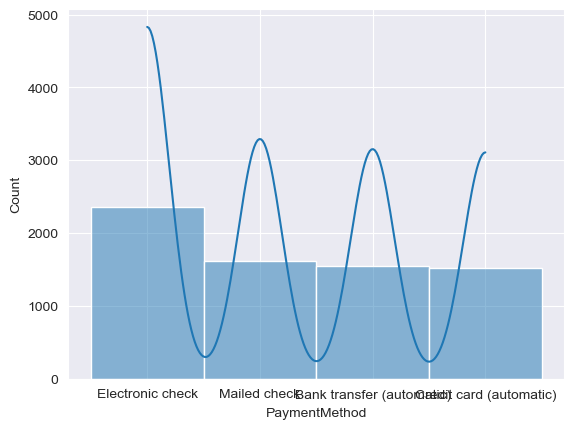

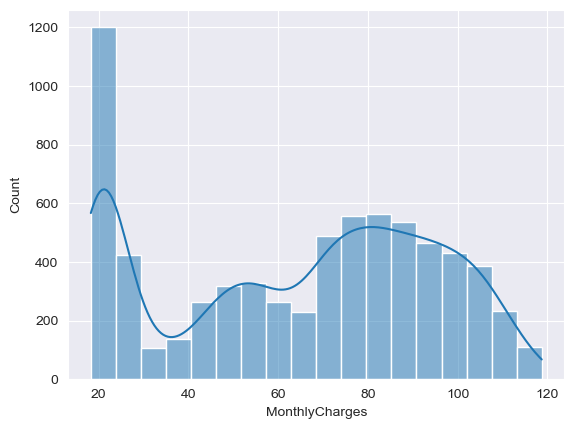

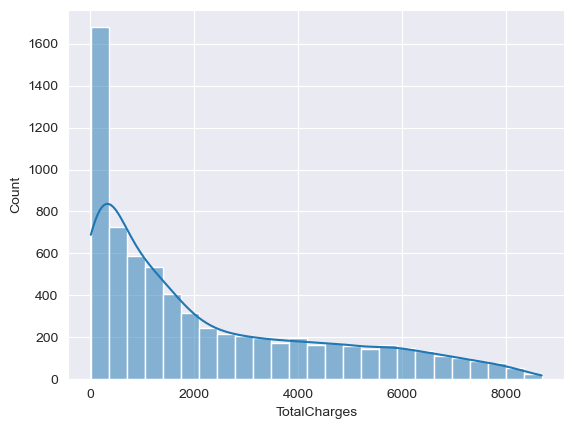

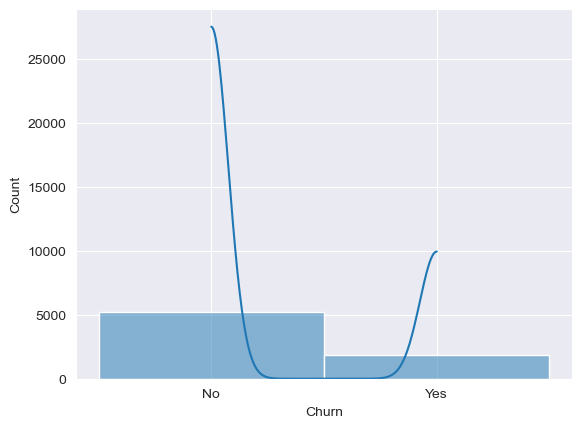

In [10]:
for col in df.columns:
    sns.histplot(data = df, x=col, kde=True)
    plt.show()

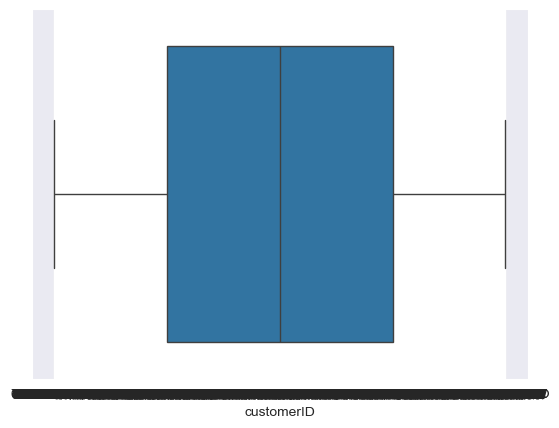

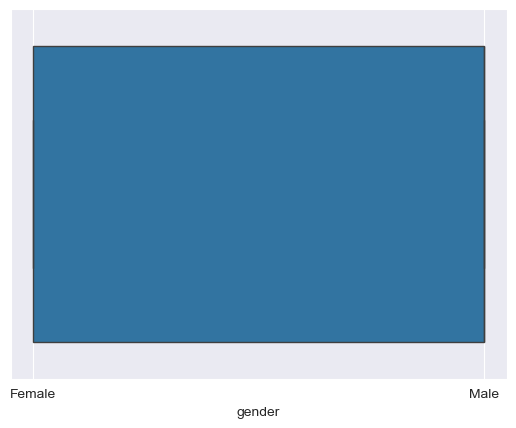

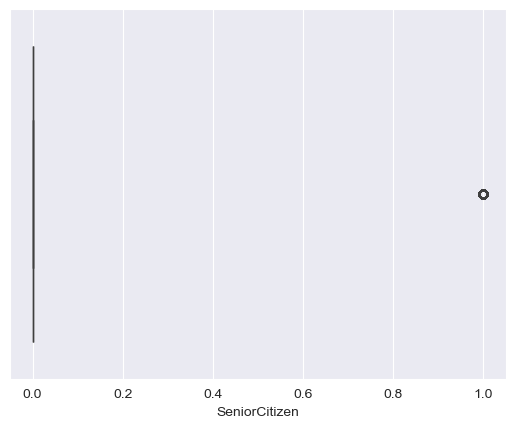

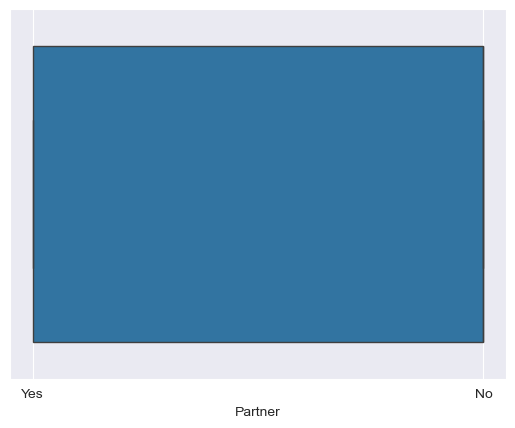

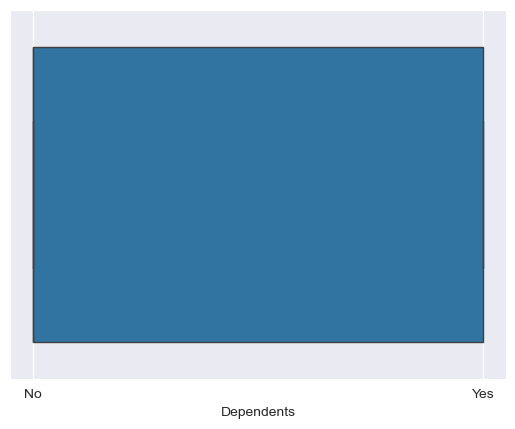

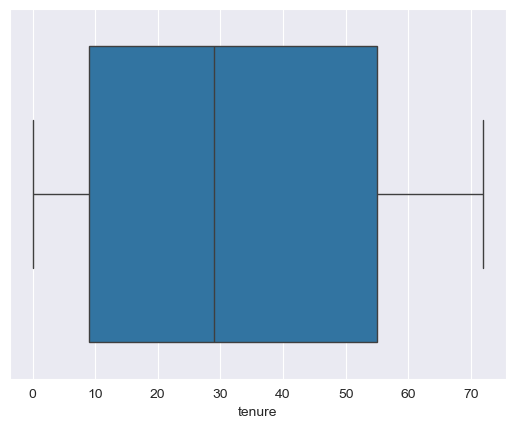

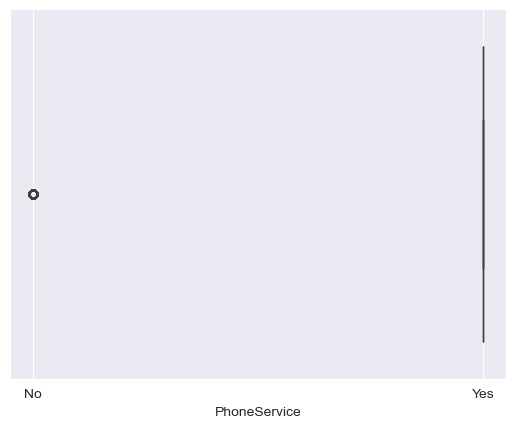

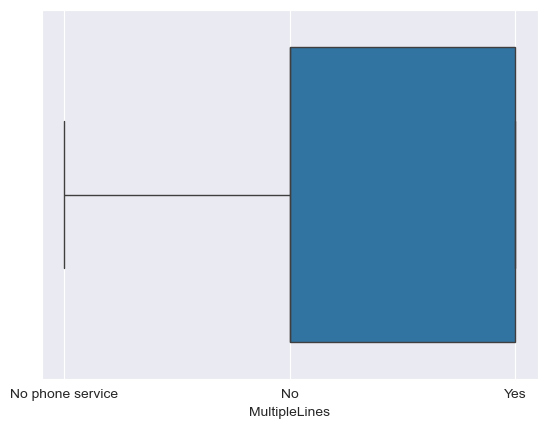

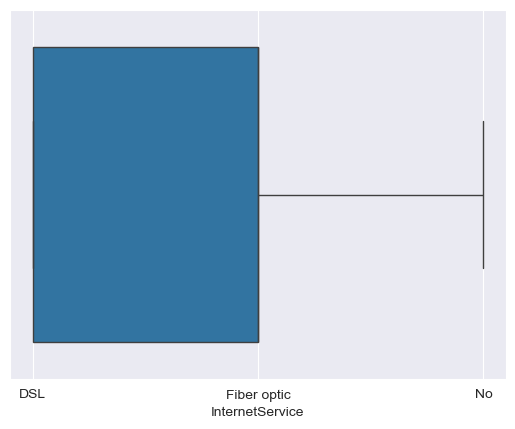

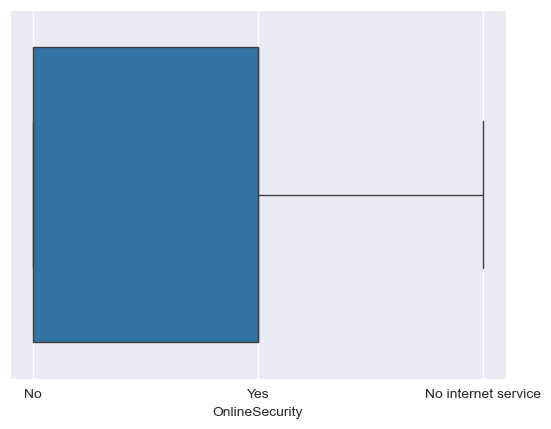

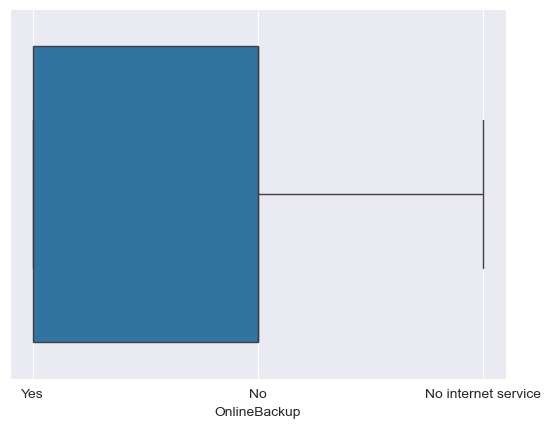

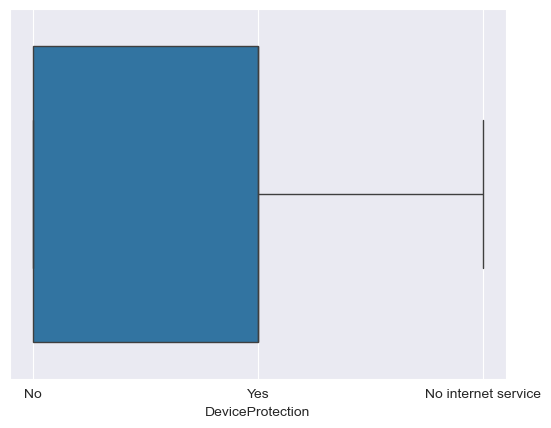

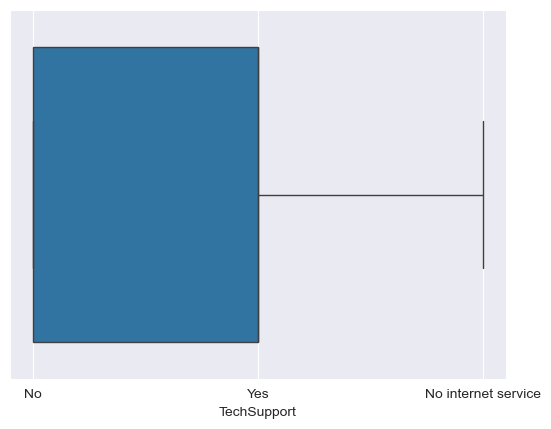

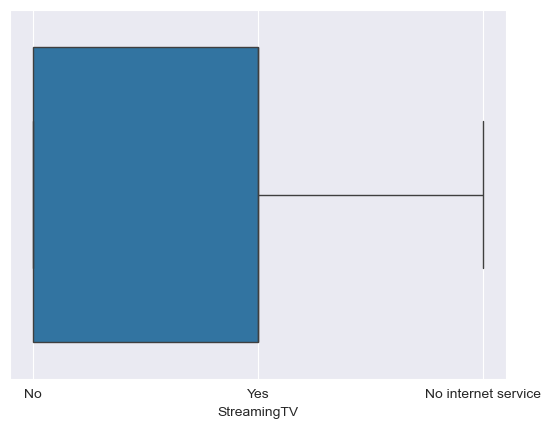

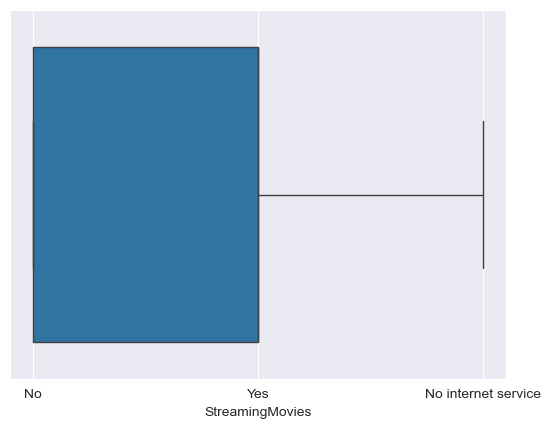

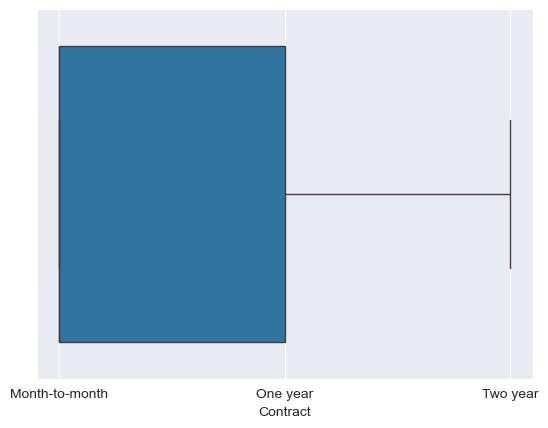

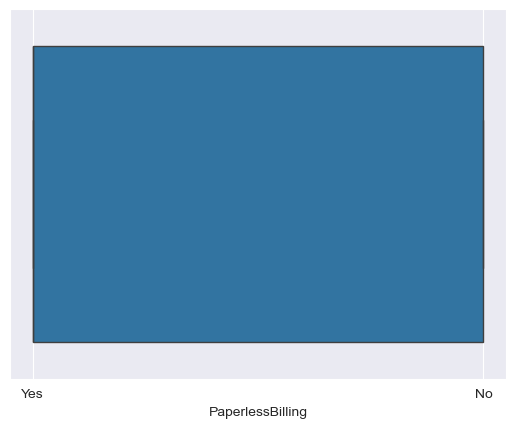

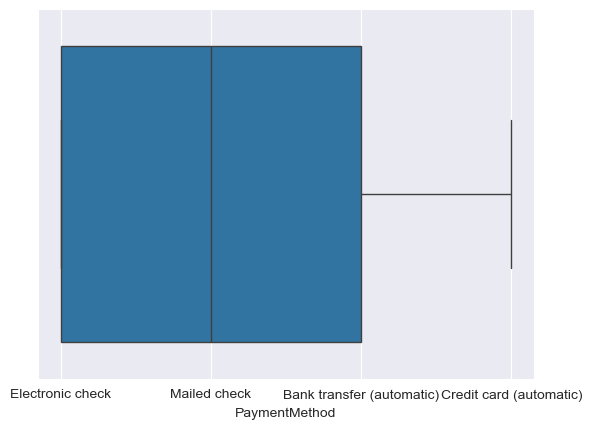

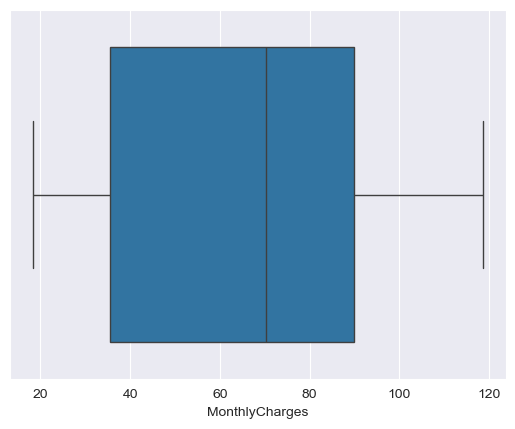

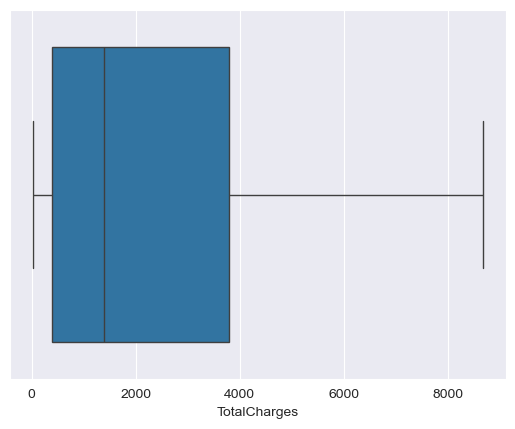

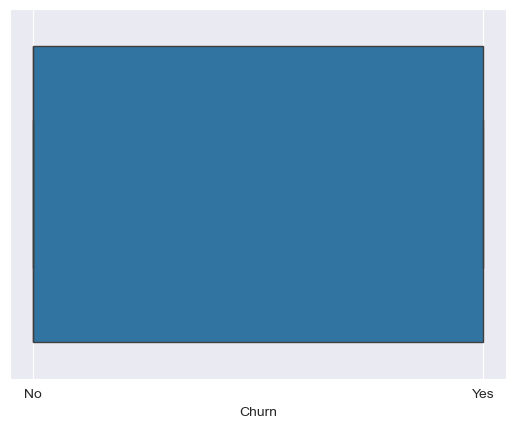

In [11]:
for col in df.columns:
    sns.boxplot(x=col, data=df)
    plt.show()

In [12]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [13]:
numeric_df = df.select_dtypes(include=[np.number])

In [14]:
phik_corr = numeric_df.phik_matrix()
print(phik_corr)

interval columns not set, guessing: ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']
                SeniorCitizen    tenure  MonthlyCharges  TotalCharges
SeniorCitizen        1.000000  0.028663        0.304691      0.148024
tenure               0.028663  1.000000        0.411002      0.842085
MonthlyCharges       0.304691  0.411002        1.000000      0.762975
TotalCharges         0.148024  0.842085        0.762975      1.000000


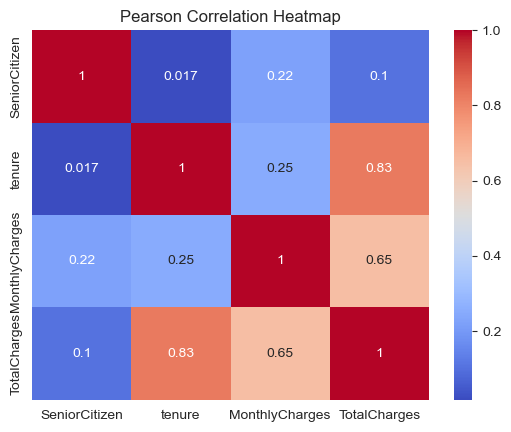

In [15]:
sns.heatmap(numeric_df.corr(method='pearson'), annot=True, cmap='coolwarm')
plt.title("Pearson Correlation Heatmap")
plt.show()

<Axes: >

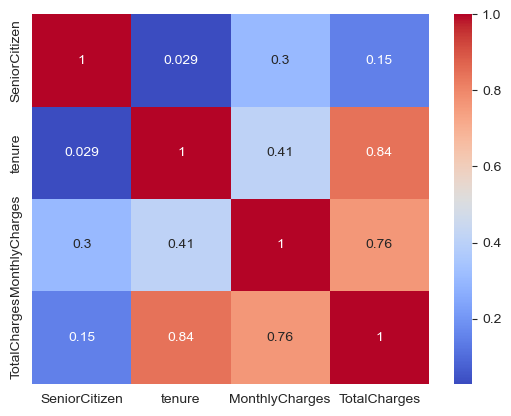

In [16]:
sns.heatmap(phik_corr, annot=True, cmap='coolwarm')

In [18]:
df.select_dtypes

<bound method DataFrame.select_dtypes of       customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  \
0              No  No phone service             

In [19]:
X = df.drop(columns=['Churn'])
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [20]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4930, 20), (2113, 20), (4930,), (2113,))

In [21]:
numeric_features = X_train.select_dtypes(include=['number']).columns
cat_features = X_train.select_dtypes(include=['object']).columns


In [23]:
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

In [25]:
num_pipe_dtc = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('pt',  PowerTransformer()),
    #('scaler', StandardScaler()),
])

cat_pipe_dtc = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False)),
])

preprocessor_dtc = ColumnTransformer([

    ('num', num_pipe_dtc, numeric_features),
    ('cat', cat_pipe_dtc, cat_features)
])

dtc_pipeline = Pipeline([
    ('preprocessor', preprocessor_dtc),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

dtc_pipeline.fit(X_train, y_train)




num_pipe_rf = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('pt',  PowerTransformer()),
    #('scaler', StandardScaler()),
])
cat_pipe_rf = Pipeline([
    #('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False)),
])
preprocessor_rf = ColumnTransformer([
    ('num', num_pipe_rf, numeric_features),
    ('cat', cat_pipe_dtc, cat_features)
])

rf_pipeline = Pipeline([
    ('preprocessor', preprocessor_rf),
    ('classifier', RandomForestClassifier(random_state=42))
])
rf_pipeline.fit(X_train, y_train)
rf_pred = rf_pipeline.predict(X_test)
rf_probs = rf_pipeline.predict_proba(X_test)[:, 1]



num_pipe_xgb = Pipeline([
    #('imputer', SimpleImputer(strategy='mean')),
    #('scaler', StandardScaler()),
    ('pt',  PowerTransformer()),
])
cat_pipe_xgb = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False)),
])

preprocessor_xgb = ColumnTransformer([
    ('num', num_pipe_xgb, numeric_features),
    ('cat', cat_pipe_xgb, cat_features)
])


xgb_pipeline = Pipeline([
    ('preprocessor', preprocessor_xgb),
    ('classifier', XGBClassifier(random_state=42))
])

xgb_pipeline.fit(X_train, y_train_encoded)
xgb_pred = xgb_pipeline.predict(X_test)
xgb_prob = xgb_pipeline.predict_proba(X_test)




#set up cat features and remainder passthrough
num_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
])

# Pass through categorical columns without preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_pipe, numeric_features),

    ],
    remainder='passthrough'  # This will leave other columns (categorical) untouched
)

# CatBoost pipeline
cat_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', CatBoostClassifier(random_state=42, verbose=0,
                                      cat_features=['remainder__'+ col for col in cat_features]))
])

cat_pipeline.fit(X_train, y_train)
cat_pred = cat_pipeline.predict(X_test)
cat_prob = cat_pipeline.predict_proba(X_test)

In [27]:
dtc_pred = dtc_pipeline.predict(X_test)
dtc_prob = dtc_pipeline.predict_proba(X_test)[:, 1]

In [28]:
classification_report_dtc = classification_report(y_test, dtc_pred)
print(classification_report_dtc)

classification_report_rf = classification_report(y_test, rf_pred)
print(classification_report_rf)

classification_report_xgb = classification_report(y_test_encoded, xgb_pred)
print(classification_report_xgb)

classification_report_cat = classification_report(y_test, cat_pred)
print(classification_report_cat)

              precision    recall  f1-score   support

          No       0.83      0.88      0.85      1539
         Yes       0.61      0.50      0.55       574

    accuracy                           0.78      2113
   macro avg       0.72      0.69      0.70      2113
weighted avg       0.77      0.78      0.77      2113

              precision    recall  f1-score   support

          No       0.81      0.92      0.86      1539
         Yes       0.67      0.44      0.53       574

    accuracy                           0.79      2113
   macro avg       0.74      0.68      0.70      2113
weighted avg       0.78      0.79      0.77      2113

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1539
           1       0.64      0.52      0.57       574

    accuracy                           0.79      2113
   macro avg       0.74      0.71      0.72      2113
weighted avg       0.78      0.79      0.78      2113

              preci


🔍 Training Logistic Regression
📊 Logistic Regression Accuracy: 0.8116
              precision    recall  f1-score   support

          No       0.85      0.90      0.87      1539
         Yes       0.68      0.57      0.62       574

    accuracy                           0.81      2113
   macro avg       0.77      0.74      0.75      2113
weighted avg       0.80      0.81      0.81      2113



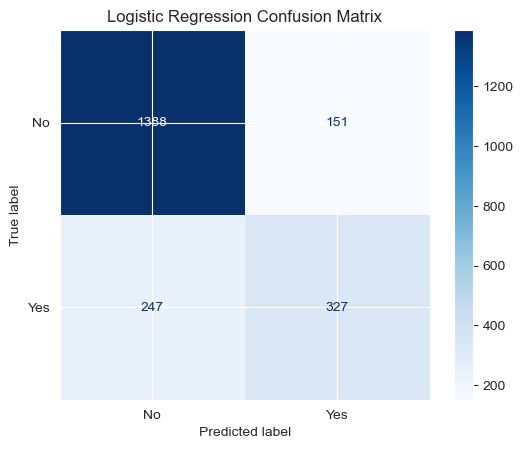


🔍 Training Random Forest
📊 Random Forest Accuracy: 0.8003
              precision    recall  f1-score   support

          No       0.83      0.92      0.87      1539
         Yes       0.69      0.48      0.57       574

    accuracy                           0.80      2113
   macro avg       0.76      0.70      0.72      2113
weighted avg       0.79      0.80      0.79      2113



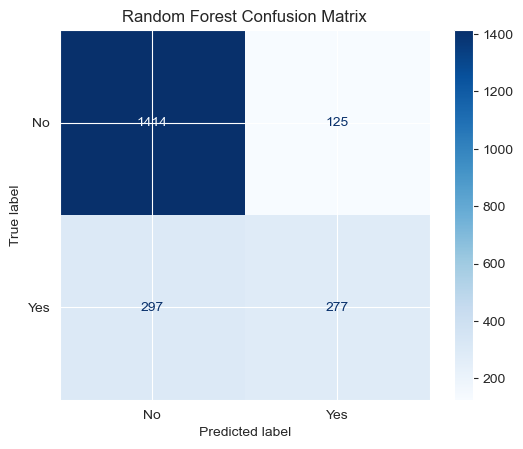


🔍 Training Decision Tree
📊 Decision Tree Accuracy: 0.7686
              precision    recall  f1-score   support

          No       0.82      0.87      0.85      1539
         Yes       0.59      0.49      0.53       574

    accuracy                           0.77      2113
   macro avg       0.70      0.68      0.69      2113
weighted avg       0.76      0.77      0.76      2113



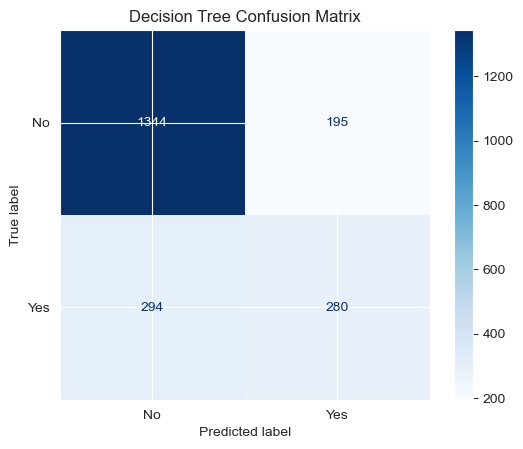


🔍 Training LightGBM
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1295, number of negative: 3635
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000966 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 669
[LightGBM] [Info] Number of data points in the train set: 4930, number of used features: 45
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.262677 -> initscore=-1.032098
[LightGBM] [Info] Start training from score -1.032098
📊 LightGBM Accuracy: 0.7970
              precision    recall  f1-score   support

          No       0.83      0.90      0.87      1539
         Yes       0.66      0.52      0.58       574

    accuracy                           0.80      2113
   macro avg       0.75      0.71      0.72      2113
weighted avg       0.79      0.80      0.79  

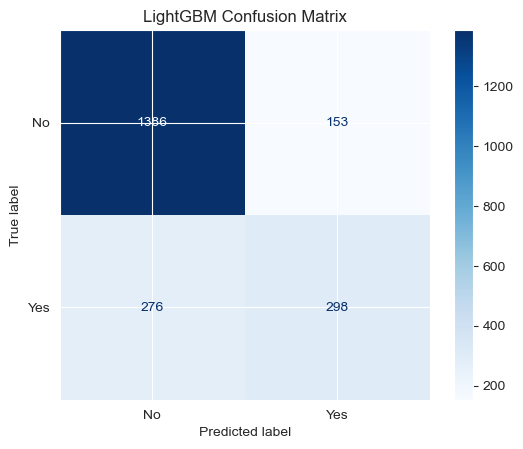

In [22]:


# 4. Identify column types
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

# 5. Preprocessing for numeric and categorical data
num_pipe = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

cat_pipe = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', num_pipe, numeric_features),
    ('cat', cat_pipe, categorical_features)
])

# 6. Define models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'LightGBM': LGBMClassifier()
}


# 8. Run models in a loop
for name, model in models.items():
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])

    print(f'\n🔍 Training {name}')
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    print(f'📊 {name} Accuracy: {accuracy_score(y_test, y_pred):.4f}')
    print(classification_report(y_test, y_pred))
    
    
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=pipeline.classes_)
    disp.plot(cmap='Blues')
    plt.title(f'{name} Confusion Matrix')
    plt.show()
    
